# CriptoTrends 2019: 
## ------ Explorando el Comportamiento del Mercado ------
### Grupo: Runtime Rebels


### Integrantes del Proyecto

1. Estiben Yair Lopez Leveron
2. Diana Myriam Priscila Santizo Cáceres
3. Giovanni Saul Concohá Cax
4. Ximena Alexandra Sabán Solórzano
5. Johan Moises Cardona Rosales


![Texto alternativo](imagenes/criptomondeas2.jpg)


---
### librerias

In [52]:
import pandas as pd              # pip install pandas
import plotly.express as px      # pip install plotly
from tabulate import tabulate    # pip install tabulate
import seaborn as sns            # pip install seaborn
import numpy as np               # pip install numpy
import matplotlib.pyplot as plt  # pip install matplotlib
# nbformat                       # pip install nbformat

# ---> **Inciso 1**

---
### Exploraremos los datos que utilizara el proyecto para determinar el formato y los datos que se necesitaran

Empezaremos explorando el archivo Algorand.csv para determinar el formato de los datos.

In [100]:
#data = pd.read_csv('algorand.csv')
data = pd.read_csv("algorand.csv")

# Mostrar las primeras filas para explorar los datos
data.head()

,date,price,total_volume,market_cap,coin_name
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand


In [101]:
# Revisar valores faltantes o nulos
missing_values = data.isnull().sum()

# Cambiar tipos de datos si es necesario
data['date'] = pd.to_datetime(data['date'])  # Asegurarse de que la fecha esté en formato datetime

# Mostrar valores faltantes y tipos de datos corregidos
missing_values, data.dtypes

(date            0
 price           0
 total_volume    0
 market_cap      0
 coin_name       0
 dtype: int64,
 date            datetime64[ns]
 price                  float64
 total_volume           float64
 market_cap             float64
 coin_name               object
 dtype: object)

 → no existen valores faltantes en los datos, y se ajustaron los datos.

In [102]:
# Asegurar que los índices estén en mayúsculas
data.index = data.index.map(lambda x: str(x).upper())

# Filtrar datos del 1 de enero de 2019 y ordenar por valor de mercado ascendente
data_filtered = data[data['date'] == '2019-01-01'].sort_values(by='market_cap', ascending=True)

# Mostrar los datos filtrados
data_filtered

,date,price,total_volume,market_cap,coin_name


parece que no se encontraron datos para el 1 de enero del 2019.

In [103]:
# Calcula el valor mínimo (la fecha más antigua) en la columna 'date' del DataFrame data.
# Calcula el valor máximo (la fecha más reciente) en la columna 'date' del DataFrame data.
date_range = (data['date'].min(), data['date'].max())

date_range

(Timestamp('2019-06-21 00:00:00'), Timestamp('2024-03-27 00:00:00'))

*Análisis:* 

➡️  vemos que el rango de fechas en el conjunto de datos es del 21 de junio de 2019 al 27 de marzo de 2024
asi que tomaremos estos datos.

In [104]:
# Crear una copia explícita
data_2019 = data[(data['date'] >= '2019-01-01') & (data['date'] <= '2019-12-31')].copy()

# Calculo el cambio porcentual diario para el precio y la capitalización de mercado
data_2019['price_change_pct'] = data_2019['price'].pct_change() * 100
data_2019['market_cap_change_pct'] = data_2019['market_cap'].pct_change() * 100

# Confirmar que las modificaciones no generen advertencias
data_2019.head()

,date,price,total_volume,market_cap,coin_name,price_change_pct,market_cap_change_pct
0,2019-06-21,1.604939,6.653181e+05,0.000000e+00,algorand,NaN,NaN
1,2019-06-22,3.172364,1.790331e+08,1.010855e+08,algorand,97.662595,inf
2,2019-06-23,2.159165,2.588226e+08,7.665618e+07,algorand,-31.938295,-24.166953
3,2019-06-24,1.899598,2.100211e+08,6.647512e+07,algorand,-12.021664,-13.281456
4,2019-06-25,1.409310,1.574706e+08,5.522254e+07,algorand,-25.810061,-16.927510


Los valores Corresponden a la criptomodena **ALGORAND**, incluyen columnas de precio, volumen total, y capitalizacion de mercado.

## **Algorand** 
es una criptomoneda y una plataforma de blockchain diseñada para ser escalable, segura y descentralizada.

### **Casos de uso:**
1. **Pagos transfronterizos:** Algorand es ideal para realizar transferencias rápidas y de bajo costo entre países.
2. **Tokenización de activos:** Permite emitir y gestionar tokens personalizados en la blockchain.
3. **DeFi:** La red soporta aplicaciones financieras descentralizadas como préstamos, intercambios y más.
4. **NFTs:** Algorand es usada para crear y comercializar tokens no fungibles debido a su velocidad y bajas tarifas.


![Texto alternativo](imagenes/Algorand_logo.png)


In [105]:
# Tendencia del precio
# Calcular el cambio porcentual diario para el precio y la capitalización de mercado
data_2019['price_change_pct'] = data_2019['price'].pct_change() * 100
data_2019['market_cap_change_pct'] = data_2019['market_cap'].pct_change() * 100

# Graficar la tendencia del precio y la capitalización de mercado
fig_price = px.line(
    data_2019,
    x='date',
    y='price',
    title='Tendencia del Precio de Algorand en 2019',
    labels={'date': 'Fecha', 'price': 'Precio (USD)'}
)

fig_market_cap = px.line(
    data_2019,
    x='date',
    y='market_cap',
    title='Tendencia de la Capitalización de Mercado de Algorand en 2019',
    labels={'date': 'Fecha', 'market_cap': 'Capitalización de Mercado (USD)'}
)

# Mostrar las gráficas
fig_price.show()
fig_market_cap.show()

*Análisis:* en 2019, algorand mostro un comportamineto tipico de lanzamiento de criptomonedas, con un pico alto y una caida en sus valor.

# ---> **Inciso 2**
## Análisis de Datos en Pandas

1. **Cargar los datos en Pandas DataFrames**:
   - Asegúrate de cargar correctamente los datos en un DataFrame de Pandas para su posterior análisis.

2. **Conectar el volumen de datos con la capitalización de mercado en dólares**:
   - Relaciona el volumen de transacciones de los activos con su capitalización de mercado expresada en dólares.

3. **Analizar el comportamiento proporcional entre ambos**:
   - Realiza un análisis para observar la relación proporcional entre el volumen de datos y la capitalización de mercado, buscando patrones o correlaciones.


In [106]:
data = pd.read_csv('algorand.csv')

In [107]:
print(data.head())

  date         price     total_volume  market_cap   coin_name
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00  algorand
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08  algorand
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07  algorand
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07  algorand
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07  algorand


In [108]:
columns = data.columns
for col in columns:
    print(f"-> {col}")

-> date
-> price
-> total_volume
-> market_cap
-> coin_name


In [109]:
# Capturar la salida de .info() en una lista
info_list = []
data_info = data.info()

# Formatear la salida de .info() en una tabla
info_list.append(["Columnas", "Non-Null Count", "Dtype"])

# Agregar cada columna con su información
for col in data.columns:
    non_null = data[col].notnull().sum()
    dtype = data[col].dtype
    info_list.append([col, non_null, dtype])

# Imprimir la tabla
print(tabulate(info_list, headers="firstrow", tablefmt="fancy_grid"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1742 entries, 0 to 1741
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1742 non-null   object 
 1   price         1742 non-null   float64
 2   total_volume  1742 non-null   float64
 3   market_cap    1742 non-null   float64
 4   coin_name     1742 non-null   object 
dtypes: float64(3), object(2)
memory usage: 68.2+ KB
╒══════════════╤══════════════════╤═════════╕
│ Columnas     │   Non-Null Count │ Dtype   │
╞══════════════╪══════════════════╪═════════╡
│ date         │             1742 │ object  │
├──────────────┼──────────────────┼─────────┤
│ price        │             1742 │ float64 │
├──────────────┼──────────────────┼─────────┤
│ total_volume │             1742 │ float64 │
├──────────────┼──────────────────┼─────────┤
│ market_cap   │             1742 │ float64 │
├──────────────┼──────────────────┼─────────┤
│ coin_name    │             1742 

In [110]:
data.describe()


,price,total_volume,market_cap
count,1742.000000,1.742000e+03,1.742000e+03
mean,0.535794,1.845966e+08,2.225644e+09
std,0.492437,2.572328e+08,2.852538e+09
min,0.088466,6.653181e+05,0.000000e+00
25%,0.214774,6.041444e+07,2.483992e+08
50%,0.312181,1.028419e+08,1.311779e+09
75%,0.784465,2.068420e+08,2.616014e+09
max,3.172364,4.496664e+09,1.339709e+10


In [111]:
data['Proporcional'] = data['total_volume'] / data['market_cap']
#Calculamos una proporcional entre estos dos valores para ver como se relacionan.

In [112]:
# Grafico de dispersión para visualizar la relacion
fig = px.scatter(
    data, 
    x='market_cap', 
    y='total_volume', 
    title='Relación entre Capitalización de Mercado y Volumen de Transacciones',
    labels={
        'market_cap': 'Capitalización de Mercado (USD)',
        'total_volume': 'Volumen de Transacciones (USD)'
    },
    template='plotly_dark', 
    hover_data=['market_cap', 'total_volume']
)

fig.show()

In [113]:
# Histograma para visualizar la distribución Proporcional
fig_Proporcional = px.histogram(
    data, 
    x='Proporcional', 
    nbins=50,  # Número de bins en el histograma
    title='Distribución de la Proporción entre Volumen de Transacciones y Capitalización de Mercado',
    labels={'Proporcional': 'Proporción (Volumen de Transacciones / Capitalización de Mercado)'},
    template='plotly_dark'
)

fig_Proporcional.show()

# ---> **Inciso 3**
---

### Preprocesamiento de Datos

1. **Identificación y Corrección de Datos Faltantes:**
   - Detectar valores faltantes o nulos en los datos.
   - Aplicar correcciones adecuadas para completar los datos.

2. **Cambio de Tipos de Datos:**
   - Convertir las columnas a los tipos de datos correctos usando `astype`.

3. **Indexación en Mayúsculas:**
   - Transformar los índices a mayúsculas utilizando el comando `str.upper()`.

4. **Agrupación y Organización:**
   - Agrupar los datos por valor de mercado (`groupby`) con base en la fecha **1 de enero de 2015**.
   - Organizar los grupos por valor de mercado en orden ascendente.


In [117]:
# 1. Identificación de valores faltantes o nulos
print("Valores nulos por columna:")
print(tabulate(data.isnull().sum().reset_index(), headers=["Columna", "Valores Nulos"], tablefmt="pretty"))

# 2. Corregir valores nulos
data = data.dropna()

# 3. Verificar y corregir nombres de las columnas (en caso de espacios)
data.columns = data.columns.str.strip()

# 4. Asegurarse de que 'PRICE' y 'DATE' estén en el formato correcto
print("Nombres de las columnas:")
print(data.columns)

# 5. Convertir los títulos de las columnas a mayúsculas
data.columns = data.columns.str.upper()

# Cambio del tipo de datos (astype) si es necesario
data['PRICE'] = pd.to_numeric(data['PRICE'], errors='coerce')  # Asegúrate de que la columna sea 'PRICE'
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')  # Convertir correctamente las fechas



# 6. Filtrar datos para el 1 de enero de 2015
data_2015 = data[data['DATE'] == pd.to_datetime('2019-01-01')]

# Verifica si data_2015 tiene datos
if not data_2015.empty:
    # 7. Agrupar por valor de mercado y ordenar por 'price' de forma ascendente
    if 'MARKET_VALUE' in data.columns and 'PRICE' in data.columns:
        grouped_data = data_2015.groupby('MARKET_VALUE').apply(lambda x: x.sort_values('PRICE', ascending=True))
        print("\nDatos agrupados y organizados:")
        print(tabulate(grouped_data.head(), headers='keys', tablefmt='pretty'))
    else:
        print("Las columnas 'MARKET_VALUE' o 'PRICE' no están disponibles para la agrupación.")
else:
    print("No hay datos para el 1 de enero de 2019.")

# 8. Ver los cambios realizados
print("\nPrimeras filas después del preprocesamiento:")
print(tabulate(data.head(), headers='keys', tablefmt='pretty'))
print("\nTítulos de las columnas después del preprocesamiento:")
print(tabulate(data.columns.to_frame(), headers=["Títulos de columnas"], tablefmt="pretty"))

Valores nulos por columna:
+---+--------------+---------------+
|   |   Columna    | Valores Nulos |
+---+--------------+---------------+
| 0 |     DATE     |       0       |
| 1 |    PRICE     |       0       |
| 2 | TOTAL_VOLUME |       0       |
| 3 |  MARKET_CAP  |       0       |
| 4 |  COIN_NAME   |       0       |
| 5 | PROPORCIONAL |       0       |
+---+--------------+---------------+
Nombres de las columnas:
Index(['DATE', 'PRICE', 'TOTAL_VOLUME', 'MARKET_CAP', 'COIN_NAME', 'PROPORCIONAL'], dtype='object')
No hay datos para el 1 de enero de 2019.

Primeras filas después del preprocesamiento:
+---+---------------------+--------------------+--------------------+--------------------+-----------+--------------------+
|   |        DATE         |       PRICE        |    TOTAL_VOLUME    |     MARKET_CAP     | COIN_NAME |    PROPORCIONAL    |
+---+---------------------+--------------------+--------------------+--------------------+-----------+--------------------+
| 0 | 2019-06-21 00

In [118]:
# Index en mayúsculas
print(data.head())

  DATE        PRICE     TOTAL_VOLUME  MARKET_CAP   COIN_NAME  PROPORCIONAL
0 2019-06-21  1.604939  6.653181e+05  0.000000e+00  algorand       inf    
1 2019-06-22  3.172364  1.790331e+08  1.010855e+08  algorand  1.771106    
2 2019-06-23  2.159165  2.588226e+08  7.665618e+07  algorand  3.376409    
3 2019-06-24  1.899598  2.100211e+08  6.647512e+07  algorand  3.159393    
4 2019-06-25  1.409310  1.574706e+08  5.522254e+07  algorand  2.851563    


# ---> **Inciso 4**
---

### Visualización de Precios de Criptomonedas en 2019

1. Seleccionar las **4 criptomonedas más relevantes** según su interés personal.
2. Graficar sus precios a lo largo del año.
3. Utilizar **subplots** para mostrar las 4 gráficas en una sola figura, cada una en su propio panel.

El objetivo es comparar las tendencias de precios de estas criptomonedas de forma clara y visual.



| **Criptomoneda** | **Lanzamiento** | **Propósito**                   | **Consenso**       | **Velocidad de Transacción** |
|-------------------|-----------------|----------------------------------|--------------------|-----------------------------|
| Bitcoin           | 2009            | Reserva de valor, pagos         | Proof of Work      | ~7 transacciones/segundo    |
| Ethereum          | 2015            | Contratos inteligentes, dApps  | Proof of Stake     | ~30 transacciones/segundo   |
| Ripple (XRP)      | 2012            | Pagos internacionales           | Ripple Consensus   | ~1500 transacciones/segundo |
| Bitcoin Cash      | 2017            | Pagos rápidos, tarifas bajas    | Proof of Work      | ~100 transacciones/segundo  |
| EOS               | 2018            | Contratos inteligentes, dApps  | Delegated PoS      | ~4000 transacciones/segundo |



### Detalles:

1. **Criptomoneda**: El nombre de la moneda.
2. **Lanzamiento**: Año en que se lanzó la moneda.
3. **Propósito**: Principales usos de la criptomoneda.
4. **Consenso**: Algoritmo utilizado para la validación de transacciones.
5. **Velocidad de Transacción**: Número promedio de transacciones que puede procesar por segundo.


![Texto alternativo](imagenes/criptomonedas.avif)


In [119]:

# Archivos y nombres de las criptomonedas
file_paths = {
    "Bitcoin": "bitcoin.csv",
    "Ethereum": "ethereum.csv",
    "Ripple": "ripple.csv",
    "Bitcoin Cash": "bitcoin-cash.csv",
    "EOS": "eos.csv"
}

# Leer y procesar los datos
dataframes = {}

for crypto, file_path in file_paths.items():
    # Cargar archivo
    df = pd.read_csv(file_path)
    # Convertir fechas a formato datetime
    df['date'] = pd.to_datetime(df['date'])
    # Filtrar datos de 2019
    df = df[df['date'].dt.year == 2019]
    # Agregar columna de mes
    df['month'] = df['date'].dt.to_period('M')
    # Calcular promedio mensual del precio
    monthly_avg = df.groupby('month')['price'].mean().reset_index()
    monthly_avg['coin_name'] = crypto
    dataframes[crypto] = monthly_avg

# Unir todos los datos
monthly_summary = pd.concat(dataframes.values())
monthly_summary['month'] = monthly_summary['month'].dt.to_timestamp()

# Graficar precios unitarios mensuales
fig = px.line(
    monthly_summary,
    x='month',
    y='price',
    color='coin_name',
    title='Precio Unitario Mensual por Criptomoneda (2019)',
    labels={'month': 'Mes', 'price': 'Precio Unitario (USD)', 'coin_name': 'Criptomoneda'}
)

fig.update_layout(height=600)
fig.show()

In [120]:
print(data.columns)


Index(['DATE', 'PRICE', 'TOTAL_VOLUME', 'MARKET_CAP', 'COIN_NAME', 'PROPORCIONAL'], dtype='object')


# ---> **Inciso 5**
---


In [121]:
# Asegurarse de que la columna 'DATE' sea de tipo datetime
data['DATE'] = pd.to_datetime(data['DATE'], errors='coerce')

# Filtrar datos para el año 2019
data_2019 = data[data['DATE'].dt.year == 2019]  # Filtrar por año directamente usando .dt.year

# Filas con valores nulos en 'price'
data_2019 = data_2019.dropna(subset=['PRICE'])  # Asegúrate de que 'PRICE' esté en formato correcto

if data_2019.empty:
    print("No se encontraron datos para el año 2019.")
else:
    # Calcular media y desviación estándar
    resultados = data_2019.groupby('COIN_NAME')['PRICE'].agg(['mean', 'std']).reset_index()

    if resultados.empty or resultados['std'].isnull().all():
        print("No hay desviaciones estándar válidas para el cálculo.")
    else:
        # Selección de la criptomoneda con la menor desviación estándar
        coin_name_con_menor_std = resultados.loc[resultados['std'].idxmin()]
        print("Criptomoneda con la menor desviación estándar en 2019:")
        print(coin_name_con_menor_std)


Criptomoneda con la menor desviación estándar en 2019:
COIN_NAME    algorand
mean         0.496431
std          0.411165
Name: 0, dtype: object


# ---> **Inciso 6**
______
### Identificar Criptomonedas por Encima de la Media

1. **Calcular la Media Global**:  
   - Calcular la media de los precios de todas las criptomonedas seleccionadas durante el año **2015**.

2. **Comparar los Precios**:  
   - Identificar cuáles criptomonedas tienen precios promedio superiores a esta media global.


In [122]:
# inciso 6
# Lista de rutas de archivos
files = ['algorand.csv', 'bitcoin.csv', 'binancecoin.csv', 'tezos.csv']

# Leer y combinar los archivos en un solo DataFrame, agregando una columna para identificarlos
data = pd.concat(
    [pd.read_csv(file).assign(coin_name=file.split('.')[0]) for file in files],
    ignore_index=True
)


# Explorar los datos combinados
print(data.head())



  date         price     total_volume  market_cap   coin_name
0  2019-06-21  1.604939  6.653181e+05  0.000000e+00  algorand
1  2019-06-22  3.172364  1.790331e+08  1.010855e+08  algorand
2  2019-06-23  2.159165  2.588226e+08  7.665618e+07  algorand
3  2019-06-24  1.899598  2.100211e+08  6.647512e+07  algorand
4  2019-06-25  1.409310  1.574706e+08  5.522254e+07  algorand


In [123]:
# Verificar fechas mínimas para cada criptomoneda
start_dates = data.groupby('coin_name')['date'].min()
print("Fechas de inicio por criptomoneda:")
print(start_dates)

Fechas de inicio por criptomoneda:
coin_name
algorand                    2019-06-21
binancecoin    2017-09-16 00:00:00.000
bitcoin        2015-01-01 00:00:00.000
tezos                       2018-07-03
Name: date, dtype: object


In [124]:
# Filtrar los datos para el año 2019
data_2019 = data[(data['date'] >= '2019-01-01') & (data['date'] <= '2019-12-31')]

# Calcular la media del precio por criptomoneda
mean_prices_by_coin = data_2019.groupby('coin_name')['price'].mean()

# Calcular la media general del precio de todas las criptomonedas
overall_mean_price = mean_prices_by_coin.mean()

# Determinar cuáles criptomonedas están por encima de la media general
above_average_coins = mean_prices_by_coin[mean_prices_by_coin > overall_mean_price]

# Mostrar resultados
print("\nMedia general del precio:", overall_mean_price)
print("\nCriptomonedas por encima de la media general:")
print(above_average_coins)


Media general del precio: 1846.0582590549936

Criptomonedas por encima de la media general:
coin_name
bitcoin    7362.712424
Name: price, dtype: float64


In [125]:
# Preparar los datos para la gráfica
graph_data = mean_prices_by_coin.reset_index()
graph_data.columns = ['Criptomoneda', 'Precio Promedio']
graph_data['Categoría'] = graph_data['Precio Promedio'].apply(
    lambda x: 'Por Encima de la Media' if x > overall_mean_price else 'Por Debajo de la Media'
)

# Crear la gráfica de barras con Plotly
fig = px.bar(
    graph_data,
    x='Precio Promedio',
    y='Criptomoneda',
    color='Categoría',
    title='Precios Promedio por Criptomoneda (2019)',
    labels={'Precio Promedio': 'Precio Promedio (USD)', 'Criptomoneda': 'Criptomoneda'},
    orientation='h'
)

# Agregar una línea de referencia para la media general
fig.add_shape(
    type='line',
    x0=overall_mean_price,
    x1=overall_mean_price,
    y0=-0.5,
    y1=len(graph_data) - 0.5,
    line=dict(color='red', dash='dash'),
    xref='x',
    yref='y'
)

# Agregar texto para la línea de referencia
fig.add_annotation(
    x=overall_mean_price,
    y=len(graph_data) - 0.5,
    text=f"Media General: {overall_mean_price:.2f} USD",
    showarrow=False,
    font=dict(color='red')
)

# Mostrar la gráfica
fig.show()

*Análisis:* comparamos bitcoin, tezos, binancecoin y algorand, y la que esta por encima de la media es bitcoin.

# ---> **Inciso 7**
---
### Criptomonedas con Mayor Valor de Mercado en los Últimos Tres Meses de 2019

1. **Filtrar el Período de Tiempo**:  
   - Considerar únicamente los datos de los últimos tres meses del año **2019** (octubre, noviembre y diciembre).

2. **Evaluar el Valor de Mercado**:  
   - Analizar el valor de mercado de cada criptomoneda en ese período.

3. **Identificar las Principales Criptomonedas**:  
   - Determinar cuáles criptomonedas tuvieron el **mayor valor de mercado** durante ese período.


In [126]:
# Archivos de las criptomonedas
file_paths = {
    "Bitcoin": "bitcoin.csv",
    "Ethereum": "ethereum.csv",
    "Ripple": "ripple.csv",
    "Bitcoin Cash": "bitcoin-cash.csv",
    "EOS": "eos.csv",
    "Litecoin": "litecoin.csv",
    "Tether": "tether.csv",
    "Binance Coin": "binancecoin.csv"
}

# Leer y procesar los datos
dataframes = {}
for crypto, path in file_paths.items():
    df = pd.read_csv(path)
    df['date'] = pd.to_datetime(df['date'])
    dataframes[crypto] = df

# Filtrar los datos para los últimos tres meses de 2019
filtered_data = []
for crypto, df in dataframes.items():
    filtered_df = df.loc[(df['date'] >= '2019-10-01') & (df['date'] <= '2019-12-31')].copy()
    filtered_df['month'] = filtered_df['date'].dt.to_period('M')
    monthly_avg = filtered_df.groupby('month')[['market_cap', 'price']].mean().reset_index()
    monthly_avg['coin_name'] = crypto
    filtered_data.append(monthly_avg)

# Combinar los datos de todas las criptomonedas
final_summary = pd.concat(filtered_data)
final_summary['month'] = final_summary['month'].dt.to_timestamp()

# Ordenar por mes y capitalización de mercado (descendente)
ordered_data = final_summary.sort_values(by=['month', 'market_cap'], ascending=False)

# Agregar posiciones
ordered_data['Position'] = ordered_data.groupby('month').cumcount() + 1

# Seleccionar columnas clave para simplicidad (sin columna de incremento)
final_table = ordered_data[['month', 'Position', 'coin_name', 'market_cap', 'price']]

# Renombrar columnas para claridad
final_table.columns = [
    'Mes', 'Posición', 'Criptomoneda',
    'Capitalización de Mercado (USD)', 'Precio Unitario (USD)'
]

# Formatear las columnas de capitalización y precio
final_table['Capitalización de Mercado (USD)'] = final_table['Capitalización de Mercado (USD)'].apply(lambda x: f"{x:,.0f}")
final_table['Precio Unitario (USD)'] = final_table['Precio Unitario (USD)'].apply(lambda x: f"{x:,.2f}")

# Configurar pandas para mostrar más columnas y un ancho ajustado
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 150)  # Ajustar ancho para la consola
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.colheader_justify', 'left')  # Justificar las columnas a la izquierda

# Mostrar la tabla en consola
print(final_table)

  Mes         Posición Criptomoneda  Capitalización de Mercado (USD) Precio Unitario (USD)
2 2019-12-01  1              Bitcoin  131,431,188,297                 7,260.19            
2 2019-12-01  2             Ethereum   15,024,696,988                   137.97            
2 2019-12-01  3               Ripple    8,995,152,570                     0.21            
2 2019-12-01  4               Tether    4,288,879,915                     1.00            
2 2019-12-01  5         Bitcoin Cash    3,671,128,881                   202.10            
2 2019-12-01  6             Litecoin    2,729,250,334                    42.82            
2 2019-12-01  7                  EOS    2,464,932,109                     2.58            
2 2019-12-01  8         Binance Coin    2,194,435,273                    14.30            
1 2019-11-01  1              Bitcoin  151,491,323,489                 8,391.82            
1 2019-11-01  2             Ethereum   18,883,408,797                   173.89            

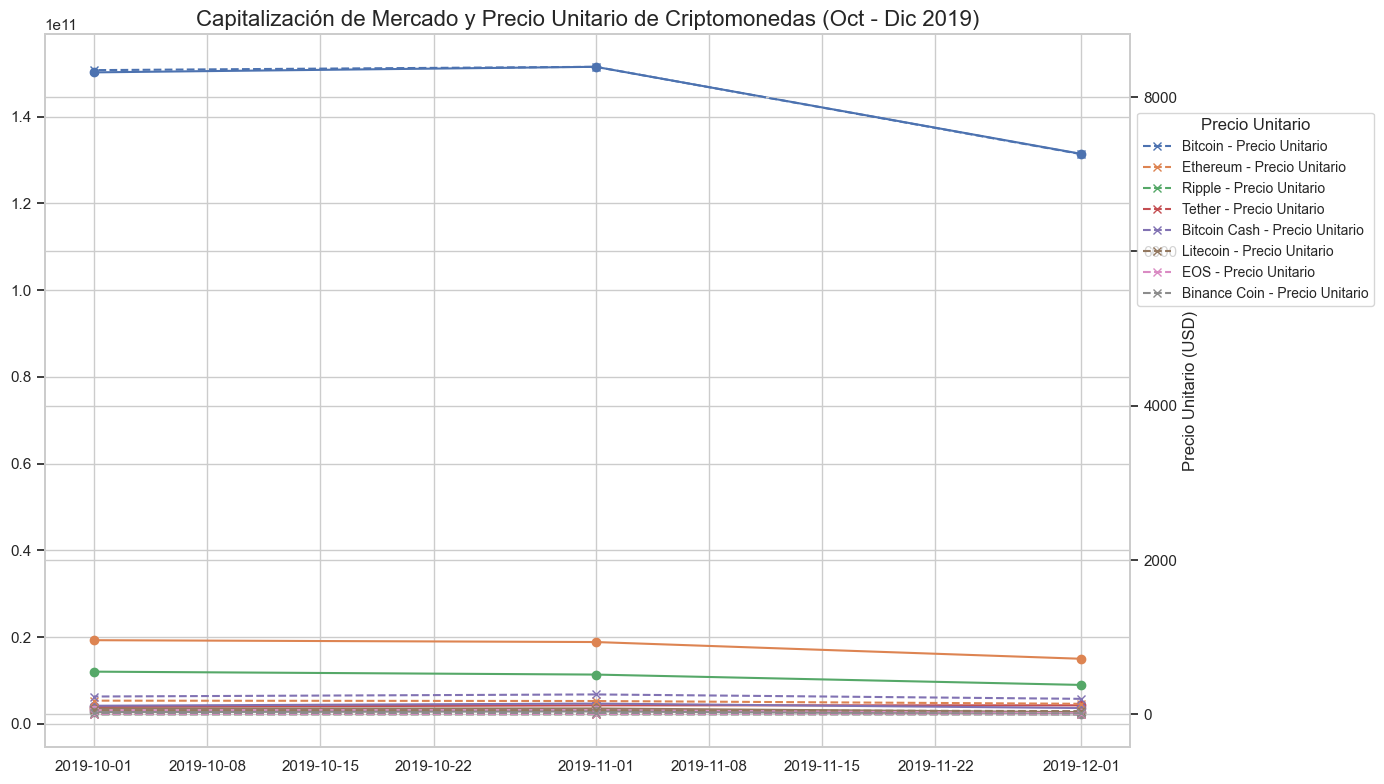

In [127]:

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Crear un gráfico de líneas para la visualización
plt.figure(figsize=(14, 8))

# Graficar la capitalización de mercado para cada criptomoneda
for crypto in final_table['Criptomoneda'].unique():
    subset = final_table[final_table['Criptomoneda'] == crypto]
    plt.plot(subset['Mes'], subset['Capitalización de Mercado (USD)'].apply(lambda x: float(x.replace(',', ''))), label=f'{crypto} - Capitalización de Mercado', marker='o')

# Crear un eje secundario para los precios unitarios
ax2 = plt.gca().twinx()

# Graficar el precio unitario para cada criptomoneda
for crypto in final_table['Criptomoneda'].unique():
    subset = final_table[final_table['Criptomoneda'] == crypto]
    ax2.plot(subset['Mes'], subset['Precio Unitario (USD)'].apply(lambda x: float(x.replace(',', ''))), label=f'{crypto} - Precio Unitario', linestyle='--', marker='x')

# Títulos y etiquetas
plt.title('Capitalización de Mercado y Precio Unitario de Criptomonedas (Oct - Dic 2019)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Capitalización de Mercado (USD)', fontsize=12)
ax2.set_ylabel('Precio Unitario (USD)', fontsize=12)

# Añadir leyenda para las dos gráficas
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Capitalización de Mercado', fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(1, 0.9), title='Precio Unitario', fontsize=10)

# Mejorar el formato de la fecha para los ejes X
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


# **---> Inciso 8**
---

### Criptomoneda Más Estable en 2019

1. **Definir Estabilidad**:  
   - La estabilidad se refiere a la criptomoneda que tuvo el menor número de fluctuaciones en su precio durante el año **2019**, lo que implica poca variabilidad en su valor.

2. **Medir la Variabilidad**:  
   - Analizar las variaciones diarias o mensuales en los precios de cada criptomoneda a lo largo de 2019.

3. **Identificar la Más Estable**:  
   - Determinar cuál criptomoneda tuvo la **menor volatilidad** o las **fluctuaciones más suaves** en su precio durante el año 2019, lo que la hace la más estable.


In [128]:

# Lista de archivos de criptomonedas
file_paths = {
    "Bitcoin": "bitcoin.csv",
    "Ethereum": "ethereum.csv",
    "Ripple": "ripple.csv",
    "Bitcoin Cash": "bitcoin-cash.csv",
    "EOS": "eos.csv",
    # Agrega más criptomonedas aquí si es necesario
}

# Leer y procesar los datos
dataframes = {}
for crypto, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['date'] = pd.to_datetime(df['date'])
    df['coin_name'] = crypto
    dataframes[crypto] = df

# Definir estabilidad como la menor variabilidad en los precios durante el 2019


In [129]:

# Ya calculamos la variabilidad anteriormente
# Ahora, creamos una gráfica de barras con los resultados
fig_variability = px.bar(
    variability_df, 
    x='Criptomoneda', 
    y='Variabilidad', 
    color='Variabilidad', 
    title='Desviación Estándar de la Variabilidad de Precios en 2019',
    labels={'Variabilidad': 'Desviación Estándar (%)', 'Criptomoneda': 'Criptomoneda'},
    template='plotly_dark'
)

fig_variability.update_layout(
    xaxis_title='Criptomoneda',
    yaxis_title='Desviación Estándar (%)',
    height=500
)

fig_variability.show()


In [130]:
# Función para calcular la volatilidad de cada criptomoneda en 2019
def calculate_price_variability(df, year=2019):
    df = df[df['date'].dt.year == year].copy()
    df['price_change_pct'] = df['price'].pct_change() * 100  # Cambio porcentual diario
    return df['price_change_pct'].std()  # Desviación estándar como medida de variabilidad

# Calcular la variabilidad para cada criptomoneda
variability = {}
for crypto, df in dataframes.items():
    variability[crypto] = calculate_price_variability(df)

# Mostrar la variabilidad de cada criptomoneda
variability_df = pd.DataFrame(list(variability.items()), columns=['Criptomoneda', 'Variabilidad'])
variability_df.sort_values(by='Variabilidad', ascending=True, inplace=True)

print(variability_df)


  Criptomoneda   Variabilidad
0       Bitcoin  3.583505    
2        Ripple  3.717347    
1      Ethereum  4.226278    
4           EOS  5.113699    
3  Bitcoin Cash  5.480769    


In [136]:
# Calcular el cambio porcentual diario del precio de cada criptomoneda
for crypto, df in dataframes.items():
    df['price_change_pct'] = df['price'].pct_change() * 100  # Calculamos el cambio porcentual diario

# Graficar el cambio porcentual diario del precio de cada criptomoneda durante 2019
fig_daily_changes = px.line(
    dataframes['Bitcoin'],  # Usamos Bitcoin como ejemplo, pero esto puede extenderse a otras criptos
    x='date', 
    y='price_change_pct', 
    title='Cambio Porcentual Diario de Bitcoin en 2019',
    labels={'price_change_pct': 'Cambio Porcentual Diario (%)', 'date': 'Fecha'},
    template='plotly_dark'
)

fig_daily_changes.update_layout(
    xaxis_title='Fecha',
    yaxis_title='Cambio Porcentual Diario (%)',
    height=500
)

fig_daily_changes.show()

In [132]:
# Graficar el histograma del cambio porcentual diario
fig_histogram = px.histogram(
    dataframes['Bitcoin'],  # Usamos Bitcoin como ejemplo
    x='price_change_pct',
    nbins=50,  # Número de bins
    title='Distribución del Cambio Porcentual Diario de Bitcoin en 2019',
    labels={'price_change_pct': 'Cambio Porcentual Diario (%)'},
    template='plotly_dark'
)

fig_histogram.update_layout(
    xaxis_title='Cambio Porcentual Diario (%)',
    yaxis_title='Frecuencia',
    height=500
)

fig_histogram.show()


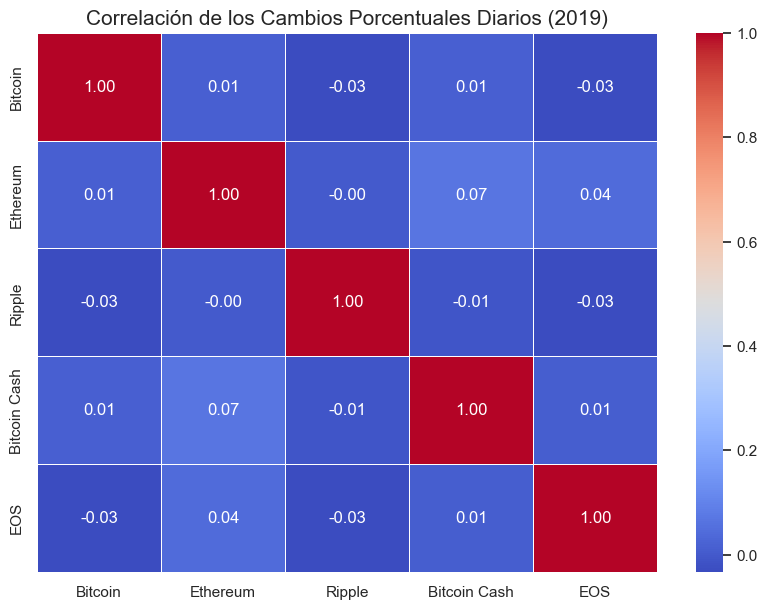

In [133]:

# Crear un DataFrame con los cambios porcentuales diarios de todas las criptomonedas
change_pct_df = pd.DataFrame()

for crypto, df in dataframes.items():
    df['price_change_pct'] = df['price'].pct_change() * 100
    change_pct_df[crypto] = df['price_change_pct']

# Calcular la correlación
correlation_matrix = change_pct_df.corr()

# Graficar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación de los Cambios Porcentuales Diarios (2019)', fontsize=15)
plt.show()


In [134]:
# Encontrar la criptomoneda con la menor volatilidad (variabilidad)
most_stable_coin = variability_df.iloc[0]
print(f"La criptomoneda más estable de 2019 es: {most_stable_coin['Criptomoneda']}")


La criptomoneda más estable de 2019 es: Bitcoin


# **---> Inciso 9**
---

### Criptomoneda Más Volátil en 2019 a 2024

1. **Definir Volatilidad**:  
   - La volatilidad se refiere a las variaciones significativas en los precios de una criptomoneda durante el año **2019**.

2. **Analizar las Fluctuaciones**:  
   - Calcular las diferencias diarias en los precios de cada criptomoneda a lo largo del año.

3. **Identificar la Más Volátil**:  
   - Determinar qué criptomoneda experimentó la **mayor cantidad de fluctuaciones** en su precio durante 2019.


In [135]:
# Inciso 9

# CALCULAR LA MONEDA MÁS VOLATIL POR AÑO

# Lista de archivos de criptomonedas
file_paths = {
    "Bitcoin": "bitcoin.csv",
    "Ethereum": "ethereum.csv",
    "Ripple": "ripple.csv",
    "Bitcoin Cash": "bitcoin-cash.csv",
    "EOS": "eos.csv",
    # Agrega más criptomonedas aquí si es necesario
}

# Leer y procesar los datos
dataframes = {}

for crypto, file_path in file_paths.items():
    df = pd.read_csv(file_path)  # Esto ahora debería funcionar
    df['date'] = pd.to_datetime(df['date'])
    df['coin_name'] = crypto
    dataframes[crypto] = df

# Función para calcular la volatilidad de cada año
def get_most_volatile_coin_per_year(dataframes):
    volatile_coins = []
    
    for crypto, df in dataframes.items():
        for year in range(2019, 2025):  # 2019 a 2024
            yearly_data = df[df['date'].dt.year == year].copy()
            if not yearly_data.empty:
                # Calcular el cambio porcentual diario del precio
                yearly_data['price_change_pct'] = yearly_data['price'].pct_change() * 100
                # Calcular la desviación estándar (volatilidad) del cambio porcentual
                volatility = yearly_data['price_change_pct'].std()
                volatile_coins.append({'year': year, 'coin_name': crypto, 'volatility': volatility})
    
    return volatile_coins

# Obtener la criptomoneda más volátil de cada año
most_volatile_per_year = get_most_volatile_coin_per_year(dataframes)

# Convertir los resultados a un DataFrame
volatile_df = pd.DataFrame(most_volatile_per_year)

# Graficar los resultados
fig = px.bar(
    volatile_df,
    x='year',
    y='volatility',
    color='coin_name',
    title='Criptomonedas Más Volátiles por Año (2019-2024)',
    labels={'year': 'Año', 'volatility': 'Volatilidad (%)', 'coin_name': 'Criptomoneda'},
    barmode='group',
    template='plotly_dark'
)

fig.update_layout(height=600)
fig.show()
